# Hashing of files

In [ ]:
%pip install pillow
%pip install requests

In [1]:
from requests import get as HttpGet
from IPython.display import display

from PIL.Image import Image
from PIL.Image import open as open_image

from io import BytesIO

import hashlib

In [3]:
def hash_file_sha1(
    location_of_file: str
) -> str:
    value: str | None = None
    hash_algorithm = hashlib.sha1()

    with open(
        location_of_file, 
        'rb'
    ) as file:
        chunk = 0

        while chunk != b'':
            chunk = file.read(1024)
            hash_algorithm.update(chunk)

    value = str(
        hash_algorithm.hexdigest()
    )

    return value

In [4]:
headers = {
    'User-Agent': 'jupyter-script/0.1(https://github.com/KentVejrupMadsen/codespace.jupyter; kent.vejrup.madsen@designermadsen.dk)'
}

url: str = 'https://upload.wikimedia.org/wikipedia/commons/c/c9/Spangsbjerghaven%2C_Esbjerg.jpg'

In [5]:
response = HttpGet(
    url, 
    headers=headers
)

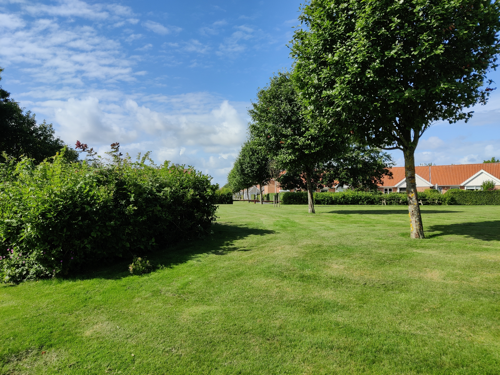

In [6]:
image: Image = open_image(
    BytesIO(
        response.content
    )
)

size_width, size_height = image.size
display(
    image.copy().resize(
        (
            int(size_width/8), 
            int(size_height/8)
        )
    )
)

In [7]:
path_to_saved_image: str = '/tmp/tmp_output.jpg'

In [8]:
image.save(
    path_to_saved_image, 
    quality=95, 
    subsampling=1
)

In [12]:
print(
    hash_file_sha1(
        path_to_saved_image
    )
)

b1e37ba99c281d81fd612adaa19bfb1888eead15
